In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom, Resizing, Rescaling

In [2]:
# Extract data
X = np.load('Xtrain_Classification_Part2.npy')
y = np.load('Ytrain_Classification_Part2.npy')

X_train, X_validate, train_labels, test_labels = train_test_split(X,y)


In [3]:
class_names = ['caucasian', 'african', 'asian', 'indian']

# Reshape to 50x50 pixel images
pixels = 50
train_images = []
test_images = []

for image in X_train:
    train_images.append(image.reshape(pixels, pixels))

for image in X_validate:
    test_images.append(image.reshape(pixels, pixels))

train_images = np.array(train_images)
test_images = np.array(test_images)

In [4]:
# Normalizing
train_images = train_images / 255.0
test_images = test_images / 255.0

X_train = X_train / 255.0
X_validate = X_validate / 255.0

In [5]:
# Building CNN Model
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

In [6]:
model.compile(  optimizer='adam',
                loss = 'sparse_categorical_crossentropy', #'binary_crossentropy',
                metrics = ['accuracy'])

In [7]:
# Train model
train_images = np.reshape(train_images, (len(train_images), 50, 50, 1))
test_images = np.reshape(test_images, (len(test_images),50, 50, 1))

history = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs = 10)

Epoch 1/10
173/173 [==============================] - 21s 124ms/step - loss: 0.9770 - accuracy: 0.6207 - val_loss: 0.8694 - val_accuracy: 0.6412
Epoch 2/10
173/173 [==============================] - 21s 119ms/step - loss: 0.7622 - accuracy: 0.6951 - val_loss: 0.6959 - val_accuracy: 0.7166
Epoch 3/10
173/173 [==============================] - 20s 116ms/step - loss: 0.6603 - accuracy: 0.7525 - val_loss: 0.6291 - val_accuracy: 0.7671
Epoch 4/10
173/173 [==============================] - 20s 117ms/step - loss: 0.6036 - accuracy: 0.7750 - val_loss: 0.5693 - val_accuracy: 0.7845
Epoch 5/10
173/173 [==============================] - 20s 115ms/step - loss: 0.5537 - accuracy: 0.7965 - val_loss: 0.5239 - val_accuracy: 0.7986
Epoch 6/10
173/173 [==============================] - 20s 113ms/step - loss: 0.4938 - accuracy: 0.8233 - val_loss: 0.5013 - val_accuracy: 0.8100
Epoch 7/10
173/173 [==============================] - 20s 114ms/step - loss: 0.4572 - accuracy: 0.8306 - val_loss: 0.4845 - val_ac

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        3

In [9]:
# Accuracy
test_images = test_images.reshape(-1, 50, 50, 1)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

58/58 [==============================] - 1s 20ms/step - loss: 0.4423 - accuracy: 0.8426
Test accuracy: 0.8425624370574951


In [10]:
predictions = model.predict(test_images) #test_images
predictions

array([[9.73597243e-02, 9.30679613e-04, 1.07684378e-02, 8.90941143e-01],
       [1.11955635e-01, 3.20091248e-02, 2.50298589e-01, 6.05736613e-01],
       [4.23754126e-01, 4.00224963e-05, 5.76172888e-01, 3.28777132e-05],
       ...,
       [9.95664179e-01, 1.14381372e-03, 1.22710958e-03, 1.96477631e-03],
       [7.94880092e-01, 1.01804920e-02, 1.38331309e-01, 5.66080622e-02],
       [4.45199847e-01, 1.75968651e-02, 3.58689070e-01, 1.78514212e-01]],
      dtype=float32)

In [11]:
# Turn predictions into labels
y_predicted = []

for i in predictions:
    y_predicted.append(np.argmax(i))

y_predicted = np.array(y_predicted)
print(y_predicted)

[3 3 2 ... 0 0 0]


BACC = 73.96884614916641


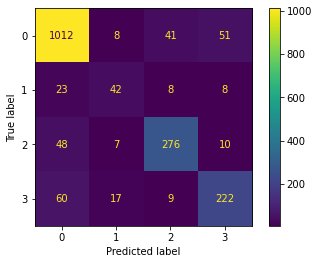

In [12]:
bacc = balanced_accuracy_score(test_labels, y_predicted)

cm = confusion_matrix(test_labels, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
print(f"BACC = {bacc * 100}")

In [13]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                            100*np.max(predictions_array),
                                            class_names[true_label]),
                                            color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

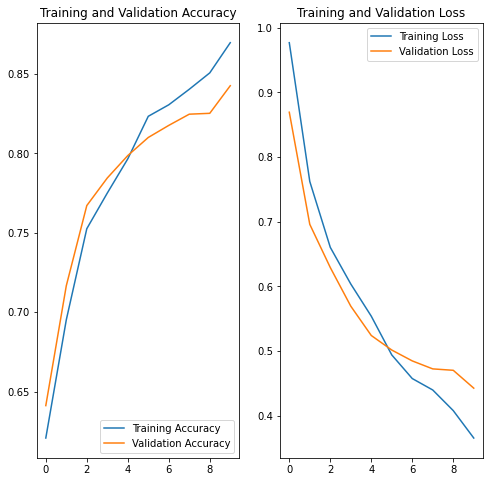

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

